In [1]:
exec(open('Template1.py').read())
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# %load http://matplotlib.org/mpl_examples/pylab_examples/contour_demo.py

M1     M2     M3     M4     M5     M6     M7  \
COUNTRY ID          YEAR                                                    
AC      ACW00011604 1961  -1.42   1.83   4.19   7.20  10.75  15.46  15.17   
                    1962   0.60   0.32  -2.07   5.82   8.55  13.28  14.57   
                    1963  -7.66  -6.06  -1.52   4.88  11.71  15.74  15.67   
                    1964   0.09  -1.38   0.02   6.85  11.66  13.89  14.53   
                    1965  -0.09  -1.58  -0.15   5.37   9.34  14.47  14.34   
...                         ...    ...    ...    ...    ...    ...    ...   
ZI      ZIXLT622116 1966  21.80  20.40  18.40  16.90  14.30  12.80  12.10   
                    1967  21.10  19.90  18.90  19.20  15.10  13.50  11.00   
                    1968  21.80  20.00  19.30  18.20  15.60  10.80  13.70   
                    1969  20.90  21.50  19.50  18.30  14.10  13.10  11.60   
                    1970  20.70  19.90  19.30  17.20  15.60  13.30  13.30   

                             M8     M9    M10    M11    M12  
COUNTRY ID          YEAR                                     
AC      ACW00011604 1961  14.28  13.60  11.21   4.57  -0.92  
                    1962  13.40  11.10   9.41   2.70  -1.79  
                    1963  15.43  12.79   8.87   5.13  -1.61  
                    1964  15.04  11.68   7.35   4.93   0.59  
                    1965  14.24  13.24   9.21  -0.22  -2.31  
...                         ...    ...    ...    ...    ...  
ZI      ZIXLT622116 1966  14.60  17.70  19.80  20.90  21.10  
                    1967  13.80  16.60  20.80  19.90  19.10  
                    1968  16.30  17.60  21.80  18.40  20.70  
                    1969  14.60  17.80  21.00  20.40  19.10  
                    1970  15.40  20.40  20.30  21.30  21.50  

[1457908 rows x 12 columns]

LATITUDE  LONGITUDE  ELEVATION                  NAME
COUNTRY ID                                                               
AC      ACW00011604     57.77      11.87       18.0                  SAVE
AE      AE000041196     25.33      55.52       34.0    SHARJAH_INTER_AIRP
        AEM00041184     25.62      55.93       31.0   RAS_AL_KHAIMAH_INTE
        AEM00041194     25.25      55.36       10.4            DUBAI_INTL
        AEM00041216     24.43      54.47        3.0  ABU_DHABI_BATEEN_AIR
...                       ...        ...        ...                   ...
ZI      ZI000067983    -20.20      32.62     1132.0              CHIPINGE
        ZI000067991    -22.22      30.00      457.0            BEITBRIDGE
        ZIXLT371333    -17.83      31.02     1471.0      HARARE_BELVEDERE
        ZIXLT443557    -18.98      32.45     1018.0            GRAND_REEF
        ZIXLT622116    -19.43      29.75     1411.0                 GWELO

[27850 rows x 4 columns]

left_corner = [28, 51.833099365234375]
right_corner = [39.61669921875, 61.96670150756836]


LATITUDE  LONGITUDE  ELEVATION                   NAME
COUNTRY ID                                                                
BO      BOM00026566     55.83      29.98     171.00            YEZERISHCHE
        BOM00026653     55.47      28.77     133.00                POLOTSK
        BOM00026659     54.88      28.70     174.00                  LEPEL
        BOM00026666     55.17      30.22     208.00                VITEBSK
        BOM00026668     54.82      29.68     176.00                  SENNO
...                       ...        ...        ...                    ...
RS      RSXLT584795     59.95      30.70      75.00  STPETERSBURG_VOEJKOVO
        RSXLT697990     55.92      37.52     190.00    MOSKVA_DOLGOPRUDNYJ
        RSXLT738182     60.00      29.80      20.00              KRONSTADT
UP      UPM00033049     52.18      32.58     161.00              SEMENOVKA
        UPM00033058     52.05      33.95     190.00                DRUZHBA

[115 rows x 4 columns]

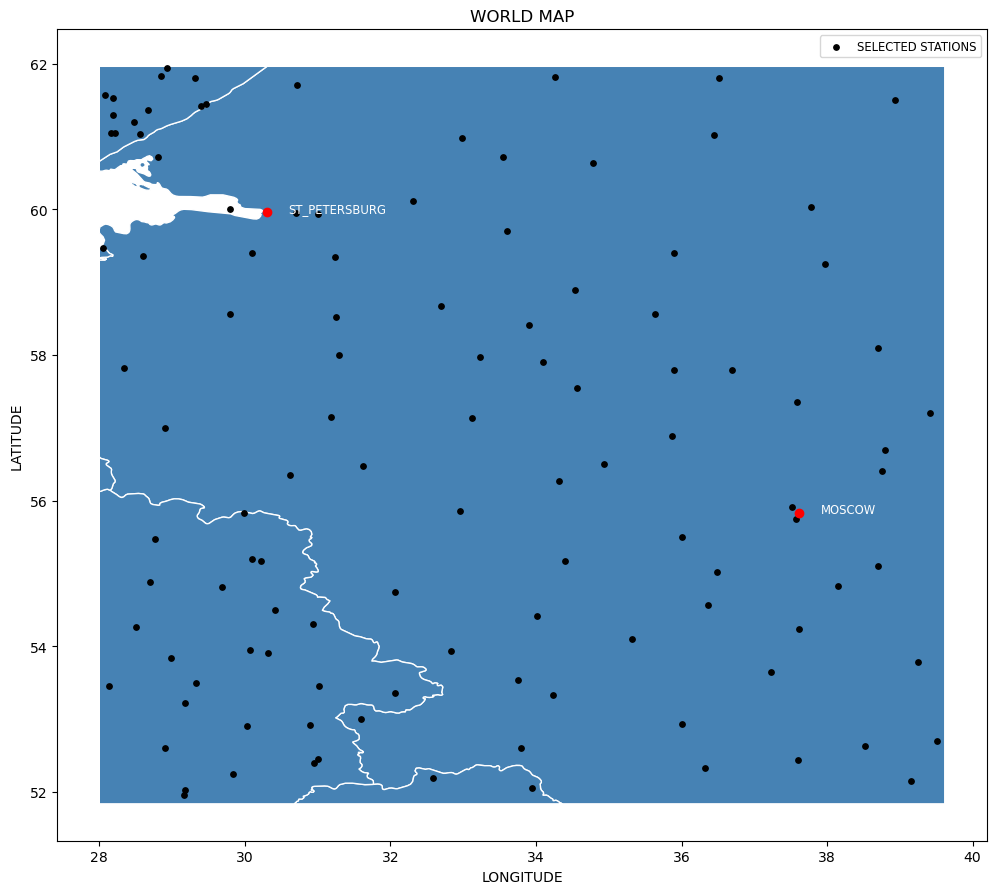

In [2]:
import pandas as pd
import geopandas
from geodatasets import get_path
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pathlib

#RSM00027612  55.8331   37.6167  156.0 MOSCOW
#RSM00026063  59.9667   30.3000    3.0 ST_PETERSBURG 

"""------------PLOT STATIONS USING GEOPANDAS ----------------------------------------------"""

country_labels = ('RS')
boundary_stations = ['RSM00026063', 'RSM00027612']
range_lonlat = [(30,37),(55,59)]

#station radius longitude and lattitude
r = [2,2] 

# -------CLIP SELECTED AREA BY LONGITUDE AND LATITUDE WITH RECTANGUALAR AREA LIMITS ------

#map radius longitude and lattitude
r = [2,2]

boundary_lonlat = pd.concat([
                             msf.loc[(slice(None,None,None), boundary_stations[0]), :],
                             msf.loc[(slice(None,None,None), boundary_stations[1]), :]])

left_corner  = [
                min(boundary_lonlat['LONGITUDE'].min() - r[0], range_lonlat[0][0] - r[0]),
                min(boundary_lonlat['LATITUDE'].min()  - r[1], range_lonlat[1][0]) - r[1]]

right_corner = [
                max(boundary_lonlat['LONGITUDE'].max() + r[0], range_lonlat[0][1] + r[0]),
                max(boundary_lonlat['LATITUDE'].max() + r[1], range_lonlat[1][1]  + r[1])]

print(f'left_corner = {left_corner}\nright_corner = {right_corner}')

stations_lonlat = msf.loc[
                          msf["LONGITUDE"].between(left_corner[0],right_corner[0]) &                           
                          msf["LATITUDE"].between(left_corner[1],right_corner[1])]

display(stations_lonlat)


"""------------PLOT STATIONS USING GEOPANDAS ----------------------------------------------"""

#worldmap file load
home_directory = "D:/" +  "/ClimateData/Data/Maps/ne_10m_admin_0_countries/"
file_name = "ne_10m_admin_0_countries.shp"
location = pathlib.Path(home_directory)
path = location / file_name
world = geopandas.read_file(path)

fig, ax = plt.subplots(figsize=(12,12))
#----------SELECT AREA BY CONTRIES CODE---------------------------------------------------
#iso_coutries = ['BY', 'RU']
#world[world['ISO_A2'].isin(iso_coutries)].plot(ax = ax,color='steelblue')


#plot area map
world.clip(left_corner + right_corner).plot(ax = ax,color='steelblue', edgecolor='white') #lightblue steelblue

#plot selected stations
geometry = [Point(xy) for xy in zip(stations_lonlat['LONGITUDE'], stations_lonlat['LATITUDE'])]
geo_station = geopandas.GeoDataFrame(stations_lonlat, geometry=geometry)
geo_station.plot(ax=ax, marker='o', color='black', markersize=15);

for i in [0,1]:
    idx = (slice(None,None,None), boundary_stations[i])
    lonB = stations_lonlat.loc[idx,'LONGITUDE']
    latB = stations_lonlat.loc[idx,'LATITUDE']
    
    geopandas.GeoDataFrame(
                           stations_lonlat.loc[idx,:], 
                           geometry=geopandas.points_from_xy(lonB, latB)).plot(ax=ax, color="red")
    ax.annotate(
                stations_lonlat.loc[idx,'NAME'].values[0],  
                xy=(lonB.values[0]+0.3,latB.values[0]), 
                color='white', fontsize="small")
    
ax.title.set_text("WORLD MAP")
ax.legend(loc='best', fontsize='small', labels=["SELECTED STATIONS"])
ax.set_xlabel("LONGITUDE")
ax.set_ylabel("LATITUDE")

#---LIMITS AXES-------
#ax.set_xlim(29, 39)
#ax.set_ylim(50, 62)

plt.show()


"""----------------PLOT STATION USING PLOTLY -------------------------------------------------------------"""

import plotly.express as px
#import plotly.graph_objects as go

cdf_r = stations_lonlat.reset_index()

fig = px.scatter_mapbox(
                        cdf_r, lat="LATITUDE", lon="LONGITUDE", 
                        hover_name="NAME", hover_data=["ID"],
                        color_discrete_sequence=["blue"], zoom=4, height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title_text ="Selected stations on map", title_x=0.5,font_color="black")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":10})


for i in [0,1]:
    idx = (slice(None,None,None), boundary_stations[i])
    lonB = stations_lonlat.loc[idx,'LONGITUDE']
    latB = stations_lonlat.loc[idx,'LATITUDE']
    fig_temp = px.scatter_mapbox(
                        lat=latB, lon=lonB,  
                        hover_name = stations_lonlat.loc[idx,'NAME'], 
                        color_discrete_sequence=["red"], size = [10])
    fig.add_trace(fig_temp.data[0])

fig.show()


In [4]:
import numpy as np

#year_labels = (np.arange(2000,2023, 2))
year_labels = (2000)
month_columns = ('M9')

idx = pd.IndexSlice[:, stations_lonlat.index.get_level_values('ID'),year_labels]
cdf = pd.DataFrame(mdf.loc[idx, month_columns]).reset_index(level = 'YEAR', drop =False)
cdf = cdf.dropna(how='any')

""" ---MERGE TEMPERATURE DATA AND STATIONS ATTRIBUTES LONGITUDE, LATITUDE, ELEVATION AND NAME-----------"""
cdf_lonlat = cdf.merge(stations_lonlat, on = ['ID'], how = 'left')
display(cdf_lonlat)


YEAR    M9  LATITUDE  LONGITUDE  ELEVATION                   NAME
ID                                                                            
BOM00026566  2000  9.56     55.83      29.98     171.00            YEZERISHCHE
BOM00026653  2000  9.63     55.47      28.77     133.00                POLOTSK
BOM00026659  2000 10.35     54.88      28.70     174.00                  LEPEL
BOM00026666  2000  9.72     55.17      30.22     208.00                VITEBSK
BOM00026668  2000 10.08     54.82      29.68     176.00                  SENNO
...           ...   ...       ...        ...        ...                    ...
RSXLT181644  2000 10.30     55.75      37.57     147.00                 MOSKVA
RSXLT584795  2000 10.60     59.95      30.70      75.00  STPETERSBURG_VOEJKOVO
RSXLT697990  2000 10.00     55.92      37.52     190.00    MOSKVA_DOLGOPRUDNYJ
UPM00033049  2000 11.38     52.18      32.58     161.00              SEMENOVKA
UPM00033058  2000 11.45     52.05      33.95     190.00                DRUZHBA

[88 rows x 6 columns]

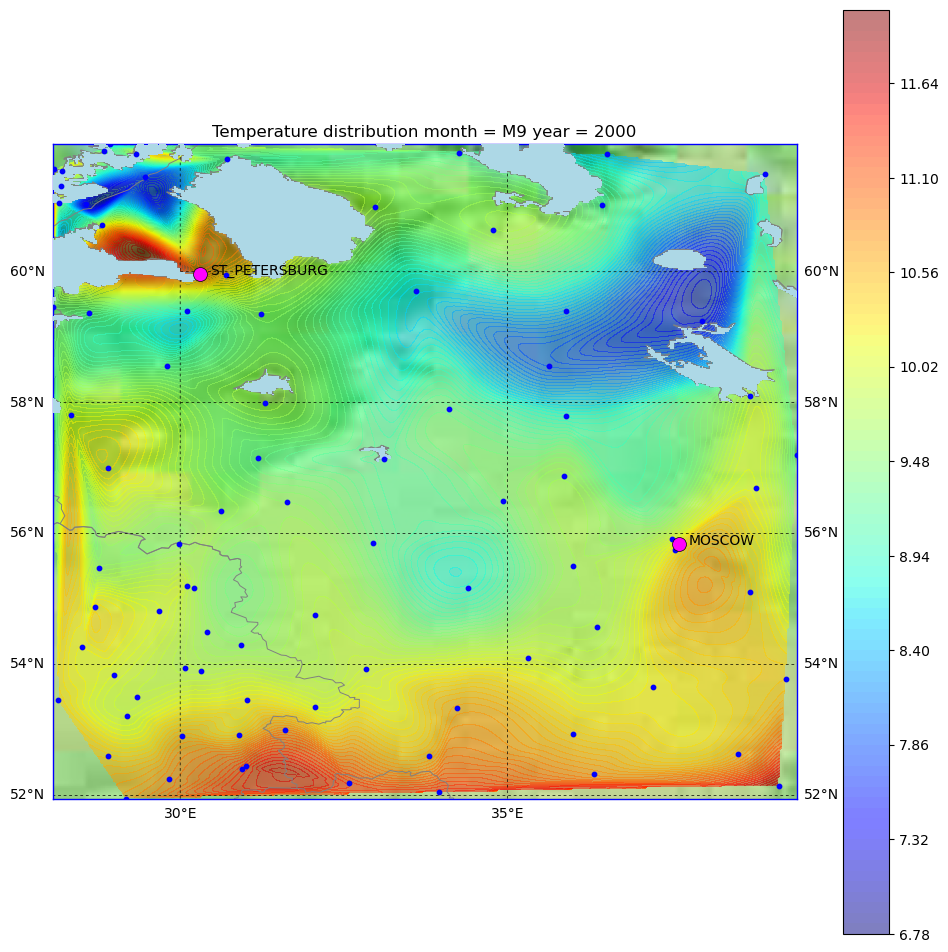

In [5]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

import plotly.graph_objects as go

x = cdf_lonlat.loc[:,'LONGITUDE']
y = cdf_lonlat.loc[:,'LATITUDE']
z = cdf_lonlat.loc[:,month_columns]

sz = len(x)

xi = np.linspace(x.min(), x.max(), 5*sz)
yi = np.linspace(y.min(), y.max(), 5*sz)

X,Y = np.meshgrid(xi,yi)
Z = griddata((x,y),z,(X,Y), method='cubic')

import mpl_toolkits
from mpl_toolkits.basemap import Basemap

#fig = plt.figure(figsize = (12, 12))

fig, ax = plt.subplots(figsize = (12, 12)) 

#m = Basemap()

plt.title(f'Temperature distribution month = {str(month_columns)} year = {str(year_labels)}', fontsize=12)

#https://matplotlib.org/basemap/users/mapsetup.html
m = Basemap(projection = 'cyl', resolution='i', llcrnrlon = x.min(), llcrnrlat = y.min(), urcrnrlon = x.max(), urcrnrlat = y.max()) 

m.contourf(X, Y, Z, levels = 100, cmap=plt.cm.jet, alpha=0.5,  zorder = 2) #linestyles='None',
#m.contour(X, Y, Z, levels = 25, cmap=plt.cm.jet, zorder = 2)

m.drawcoastlines(linewidth=1.0, color='grey')
m.drawcountries(linewidth=0.7, linestyle='solid', color='grey')
m.fillcontinents(color='white',lake_color='lightblue', alpha=0.9)
m.drawmapboundary(color='b', linewidth=1.0, fill_color='lightblue')

m.drawmeridians(range(0, 360, 5), color='k', linewidth=0.5, dashes=[4, 4], labels=[0, 1, 0, 1])
m.drawparallels(range(-90, 100, 2), color='k', linewidth=0.5, dashes=[4, 4], labels=[1, 1, 1, 1])
m.drawlsmask(land_color=(0, 0, 0, 0), ocean_color="lightblue", resolution = 'i', lakes=True, grid=1.25, zorder = 3) #7777ff

#m.shadedrelief(zorder = 1)
#display etopo relief image (from http://www.ngdc.noaa.gov/mgg/global/global.html) -  argument to apply shaded relief image as a background map
m.etopo(scale=2, zorder = 1)

cbar = plt.colorbar()

xm, ym = m(x, y)  # transform coordinates
plt.scatter(xm, ym, 10, marker='o', color='blue', zorder = 3)

for i in [0,1]:
    idx = (slice(None,None,None), boundary_stations[i])
    lonB = stations_lonlat.loc[idx,'LONGITUDE'].values[0]
    latB = stations_lonlat.loc[idx,'LATITUDE'].values[0]
    st_name = stations_lonlat.loc[idx,'NAME'].values[0]
    plt.scatter(lonB, latB, 100, marker='o', color='fuchsia',linewidths = 0.5, edgecolors = "black", zorder = 3)
    ax.annotate(st_name, xy = (lonB+0.15, latB), zorder = 3) 
plt.show()
